Original Maze:
S . . # . . .
# # . # . # .
. . . . . # .
. # # # . # .
. . . # . . E

Solving using BFS...
BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6)]


<ipython-input-13-97ad3a3decc6>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


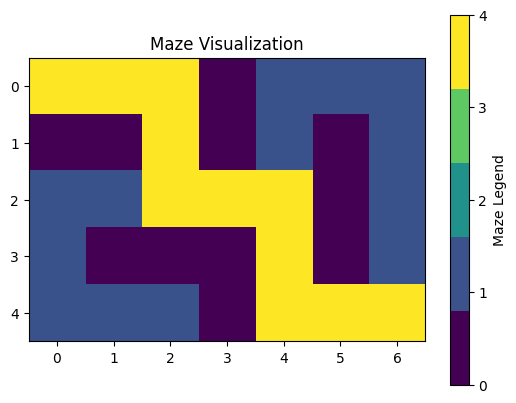


Solving using DFS...
DFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6)]


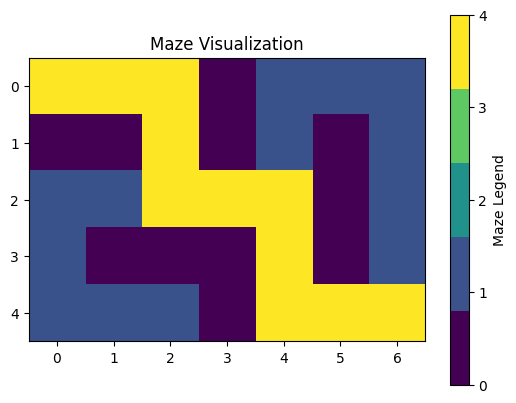

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def visualize_maze(maze, path=None):
    """Visualizes the maze and highlights the path if provided."""
    maze_colors = {
        '#': 0,  # Wall
        '.': 1,  # Open path
        'S': 2,  # Start
        'E': 3   # End
    }

    grid = np.array([[maze_colors[cell] for cell in row] for row in maze])

    if path:
        for x, y in path:
            grid[x][y] = 4  # Path

    cmap = plt.cm.get_cmap('viridis', 5)
    plt.imshow(grid, cmap=cmap)
    plt.colorbar(ticks=range(5), label='Maze Legend')
    plt.title("Maze Visualization")
    plt.show()

def bfs_solver(maze, start, end):
    """Solves the maze using Breadth-First Search."""
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while queue:
        x, y = queue.popleft()
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None
    path.append(start)
    path.reverse()
    return path

def dfs_solver(maze, start, end):
    """Solves the maze using Depth-First Search."""
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while stack:
        x, y = stack.pop()
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None
    path.append(start)
    path.reverse()
    return path

# Example Maze
def generate_sample_maze():
    return [
        ['S', '.', '.', '#', '.', '.', '.'],
        ['#', '#', '.', '#', '.', '#', '.'],
        ['.', '.', '.', '.', '.', '#', '.'],
        ['.', '#', '#', '#', '.', '#', '.'],
        ['.', '.', '.', '#', '.', '.', 'E']
    ]

def main():
    maze = generate_sample_maze()
    start = (0, 0)  # Start point (S)
    end = (4, 6)    # End point (E)

    print("Original Maze:")
    for row in maze:
        print(" ".join(row))

    print("\nSolving using BFS...")
    bfs_path = bfs_solver(maze, start, end)
    if bfs_path:
        print("BFS Path:", bfs_path)
        visualize_maze(maze, bfs_path)
    else:
        print("No path found using BFS.")

    print("\nSolving using DFS...")
    dfs_path = dfs_solver(maze, start, end)
    if dfs_path:
        print("DFS Path:", dfs_path)
        visualize_maze(maze, dfs_path)
    else:
        print("No path found using DFS.")

if __name__ == "__main__":
    main()


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import time

# Visualization function
def visualize_maze(maze, path=None, explored=None):
    """Visualizes the maze and highlights the path and explored nodes."""
    maze_colors = {
        '#': 0,  # Wall
        '.': 1,  # Open path
        'S': 2,  # Start
        'E': 3   # End
    }

    grid = np.array([[maze_colors[cell] for cell in row] for row in maze])

    if explored:
        for x, y in explored:
            if grid[x][y] == 1:  # Avoid overwriting start, end, or walls
                grid[x][y] = 4  # Explored nodes

    if path:
        for x, y in path:
            grid[x][y] = 5  # Final path

    cmap = plt.cm.get_cmap('viridis', 6)
    plt.imshow(grid, cmap=cmap)
    plt.colorbar(ticks=range(6), label='Maze Legend')
    plt.title("Maze Visualization")
    plt.show()

# BFS Algorithm
def bfs_solver(maze, start, end):
    """Solves the maze using Breadth-First Search."""
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    while queue:
        x, y = queue.popleft()
        explored.append((x, y))
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None, explored
    path.append(start)
    path.reverse()
    return path, explored

# DFS Algorithm
def dfs_solver(maze, start, end):
    """Solves the maze using Depth-First Search."""
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    while stack:
        x, y = stack.pop()
        explored.append((x, y))
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None, explored
    path.append(start)
    path.reverse()
    return path, explored

# Bi-Directional BFS Algorithm
def bidirectional_bfs_solver(maze, start, end):
    """Finds the shortest path using Bi-Directional BFS."""
    rows, cols = len(maze), len(maze[0])
    queue_start = deque([start])
    queue_end = deque([end])
    visited_start = {start: None}
    visited_end = {end: None}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    def merge_paths():
        """Merge paths from the two searches."""
        path_start = []
        step = meeting_point
        while step:
            
            path_start.append(step)
            step = visited_start[step]

        path_end = []
        step = visited_end[meeting_point]
        while step:
            path_end.append(step)
            step = visited_end[step]

        return path_start[::-1] + path_end

    while queue_start and queue_end:
        # Forward search
        x, y = queue_start.popleft()
        explored.append((x, y))
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#':
                if (nx, ny) not in visited_start:
                    visited_start[(nx, ny)] = (x, y)
                    queue_start.append((nx, ny))

                if (nx, ny) in visited_end:  # Meeting point found
                    meeting_point = (nx, ny)
                    return merge_paths(), explored

        # Backward search
        x, y = queue_end.popleft()
        explored.append((x, y))
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#':
                if (nx, ny) not in visited_end:
                    visited_end[(nx, ny)] = (x, y)
                    queue_end.append((nx, ny))

                if (nx, ny) in visited_start:  # Meeting point found
                    meeting_point = (nx, ny)
                    return merge_paths(), explored

    return None, explored

# Example Maze
def generate_sample_maze(size="medium"):
    if size == "small":
        return [
            ['S', '.', '#', 'E'],
            ['#', '.', '#', '.'],
            ['.', '.', '.', '.'],
            ['.', '#', '.', '.']
        ]
    elif size == "medium":
        return [
            ['S', '.', '.', '#', '.', '.', '.'],
            ['#', '#', '.', '#', '.', '#', '.'],
            ['.', '.', '.', '.', '.', '#', '.'],
            ['.', '#', '#', '#', '.', '#', '.'],
            ['.', '.', '.', '.', '.', '.', 'E']
        ]
    elif size == "large":
        return [
            ['S'] + ['.'] * 18 + ['E'],
            ['#'] * 20,
            ['.'] * 20
        ]

# Main Function
def main():
    print("Choose Maze Size (small, medium, large):")
    maze_size = input().strip().lower()
    maze = generate_sample_maze(maze_size)

    start = (0, 0)  # Start point (S)
    end = (len(maze) - 1, len(maze[0]) - 1)  # End point (E)

    print("Choose Algorithm (BFS, DFS, Bi-Directional BFS):")
    algorithm = input().strip().lower()

    print("Original Maze:")
    for row in maze:
        print(" ".join(row))

    start_time = time.time()

    if algorithm == "bfs":
        path, explored = bfs_solver(maze, start, end)
    elif algorithm == "dfs":
        path, explored = dfs_solver(maze, start, end)
    elif algorithm == "bi-directional bfs":
        path, explored = bidirectional_bfs_solver(maze, start, end)
    else:
        print("Invalid algorithm choice.")
        return

    end_time = time.time()

    if path:
        print(f"\n{algorithm.upper()} Path:", path)
        print(f"Nodes Explored: {len(explored)}")
        print(f"Time Taken: {end_time - start_time:.4f} seconds")
        visualize_maze(maze, path, explored)
    else:
        print("No path found.")

if __name__ == "__main__":
    main()


Choose Maze Size (small, medium, large):


 bfs


TypeError: object of type 'NoneType' has no len()

# Different Code

In [6]:
# Give an odd-numbered length and height otherwise the last wall will be unvisited

In [130]:
grid_length , grid_height = tuple(map(int, input("Enter grid_length: , Enter grid_widht: ").split()))

from IPython.display import HTML
import random

grid = [[ '#' for _ in range(grid_length)] for _ in range(grid_height)]

from IPython.display import HTML, display

def display_colored_grid(grid):
    # html = '<table style="border-collapse: collapse;">'

    # for row in grid:
    #     html += '<tr>'
    #     for cell in row:
    #         if cell == 1:
    #             color = 'black'
    #         elif cell == 0:
    #             color = 'white'
    #         elif cell == -1:
    #             color = 'purple'
    #         elif cell == 99:
    #             color = 'red'
    #         elif cell == 2:
    #             color = 'green'
    #         elif cell == 3:
    #             color = 'blue'
    #         html += f'<td style="width: 10px; height: 10px; background-color: {color}; border: 1px solid gray;"></td>'
    #     html += '</tr>'
    # html += '</table>'

    # display(HTML(html))
    

    for i in range(grid_height):
        for j in range(grid_length):
          if grid[i][j] == 1:
            print(grid[i][j], end=" ")
          else:
            print(grid[i][j], end = " ")
        print()

directions = [(0, 2), (2, 0), (-2, 0), (0, -2)]

def validate_cell(cell):
    return 0<= cell[0] < grid_length and 0<= cell[1] < grid_height and grid[cell[0]][cell[1]] == '#' 

import copy
maze = copy.deepcopy(grid)

visited = []

def create_maze(grid, cell):
    current_cell = cell
    visited.append(current_cell)
    grid[current_cell[0]][current_cell[1]] = '.'
    
    random.shuffle(directions) 
    
    for direction in directions:
        new_cell = tuple(a+b for a, b in zip(direction, current_cell))
        
        if validate_cell(new_cell):
            wall_cell = (current_cell[0] + direction[0] // 2, current_cell[1] + direction[1] // 2)
            # We divide by 2 because we want to the wall to disappear, when the function is called next time with that cell, the cell becomes a path
            grid[wall_cell[0]][wall_cell[1]] = '.'
            
            create_maze(grid, new_cell)

create_maze(grid, (0, 0))
# display_colored_grid(grid)

goal_cell = (grid_length - 1, grid_height - 1)
grid[0][0] = 'S'
grid[goal_cell[0]][goal_cell[1]] = 'E'
display_colored_grid(grid)

Enter grid_length: , Enter grid_widht:  19 19


S . . . . # . . . # . . . . . . . . . 
. # # # # # . # . # # # # # . # # # . 
. . . # . . . # . . . . . . . # . . . 
# # . # . # # # # # # # # # # # . # # 
. # . . . # . . . . . # . . . . . # . 
. # # # # # # # . # # # . # # # # # . 
. # . # . . . . . # . . . # . . . . . 
. # . # . # . # # # . # # # . # # # # 
. # . . . # . . . . . # . . . . . . . 
. # . # # # # # # # # # # # # # # # . 
. . . . . # . . . . . . . . . # . . . 
# # # # . # . # # # # # # # . # . # . 
. . . # . # . . . # . . . . . . . # . 
. # # # . # # # . # # # . # # # # # # 
. . . # . . . # . . . # . . . . . . . 
. # . # # # . # # # . # # # # # # # . 
. # . . . # . . . # . . . # . . . # . 
. # . # # # # # . # # # . # . # . # . 
. # . . . . . . . . . . . # . # . . E 


In [112]:
import time


def DFS(maze, current_cell=(0, 0), visited=None, depth=0):
    
    if visited is None:
        visited = []

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return 0 <= cell[0] < grid_length and 0 <= cell[1] < grid_height and (maze[cell[0]][cell[1]] == '.' or maze[cell[0]][cell[1]] == 'S')

    x, y = current_cell

    if maze[x][y] == 'E':  # Goal condition
        print("Goal reached!")
        return True, depth

    # if current_cell not in visited:
        # display_colored_grid(maze)
    maze[x][y] = '*'
    visited.append(current_cell)

    max_depth = depth

    for direction in directions:
        new_cell = tuple(a + b for a, b in zip(current_cell, direction))
        if validate_cell(new_cell) and new_cell not in visited:
            success, sub_depth = DFS(maze, new_cell, visited, depth + 1)
            if success:
                return True, sub_depth
            max_depth = max(max_depth, sub_depth)

    # Backtrack
    # maze[x][y] = 0
    return False, max_depth


# Wrapper function to track time and space
def DFS_with_metrics(maze):
    start_time = time.time()
    success, max_depth = DFS(maze)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time required: {elapsed_time:.6f} seconds")
    print(f"Space required (maximum recursion depth): {max_depth}")

maze_dfs = copy.deepcopy(grid)
DFS_with_metrics(maze_dfs)
display_colored_grid(maze_dfs)

Time required: 0.000998 seconds
Space required (maximum recursion depth): 74
* # * * * * * * * * * # * * * * * 
* # * # # # # # # # * # * # * # # 
* # * * * * * # * * * # * # * * * 
* # # # # # * # * # # # * # # # * 
* * * * * * * # * # * # * # * * * 
# # # # # # # # * # * # * # * # # 
. . . . . . . # * # * * * # * * * 
. # # # # # . # * # # # # # * # * 
. # . # . . . # * * * * * # * # * 
. # . # . # # # # # # # * # # # * 
. # . # . # . . . . . # * * * * * 
. # . # . # . # . # # # # # # # * 
. . . # . . . # . . . # . . . # * 
# # . # # # # # # # . # . # # # * 
. . . # . . . . . . . # . . . # * 
. # # # . # # # # # # # . # . # * 
. . . # . . . . . . . . . # . . E 


In [132]:
maze_bfs = copy.deepcopy(grid)

from collections import deque
import time

def BFS(maze, start_cell=(0, 0)):
    queue = deque([start_cell])
    visited = set()
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  

    def is_valid(cell):
        x, y = cell
        return 0 <= x < grid_length and 0 <= y < grid_height and maze[x][y] == '.' and cell not in visited
    
    max_queue_size = len(queue)  # Initial queue size
    
    while queue:
        # display_colored_grid(maze)
        
        current_cell = queue.popleft()
        x, y = current_cell
        
        if maze[x][y] == 'E':
            print(f"Target found at {current_cell}")
            return True, max_queue_size

        visited.add(current_cell)
        maze[x][y] = '*'  # Mark the cell as visited (path taken)
        
        for dx, dy in directions:
            new_cell = (x + dx, y + dy)
            if is_valid(new_cell):
                queue.append(new_cell)
                visited.add(new_cell)
        
        # Track the maximum queue size during the search
        max_queue_size = max(max_queue_size, len(queue))

    return False, max_queue_size


# Wrapper function to measure time and space
def BFS_with_metrics(maze):
    start_time = time.time()
    success, max_queue_size = BFS(maze_bfs)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time required: {elapsed_time:.6f} seconds")
    print(f"Space required (maximum queue size): {max_queue_size}")
    
BFS_with_metrics(maze_bfs)
display_colored_grid(maze_bfs)

Time required: 0.001052 seconds
Space required (maximum queue size): 3
* * * * * # * * * # * * * * * * * * * 
* # # # # # * # * # # # # # * # # # * 
* * * # * * * # * * * * * * * # * * * 
# # * # * # # # # # # # # # # # * # # 
* # * * * # * * * * * # * * * * * # * 
* # # # # # # # * # # # * # # # # # * 
* # * # * * * * * # * * * # * * * * * 
* # * # * # * # # # * # # # * # # # # 
* # * * * # * * * * * # * * * * * * * 
* # * # # # # # # # # # # # # # # # * 
* * * * * # * * * * * * * * * # * * * 
# # # # * # * # # # # # # # * # * # * 
* * * # * # * * * # * * * * * * * # * 
* # # # * # # # * # # # * # # # # # # 
* * * # * * * # * * * # * * * * * * * 
* # * # # # * # # # * # # # # # # # * 
* # * * * # * * * # * * * # . . . # * 
* # * # # # # # * # # # * # . # . # * 
* # * * * * * * * * * * * # . # . . E 
